# DTM-based filtrations: demo

Raphaël Tinarrage, https://raphaeltinarrage.github.io/
<br/>
Nov 2020

This page describes the implementation and use of the method described in our paper *DTM-based Filtrations* https://arxiv.org/abs/1811.04757.

## Background

The method described in this notebook has been designed to answer the following estimation problem: given a sample of a submanifold, potentially containing anomalous points, estimate the homology groups of the submanifold.

The **DTM-filtration** is a filtration of the Euclidean space $\mathbb{R}^n$, based on a finite point cloud $X \subset \mathbb{R}^n$, and two parameters: $m \in [0,1)$ and $p \in [1, +\infty]$. The parameter $m$ corresponds to the DTM and the parameter $p$ corresponds to the radius functions. 
The DTM-filtration is a particular case of the weighted Čech filtrations.

Let $\mu$ denote the empirical probability measure on $X$, and $\mathrm{d}_{\mu,m}\colon \mathbb{R}^n\rightarrow[0, +\infty)$ the DTM on $\mu$ with parameter $m$.
The DTM-filtration $W[X,m,p]$ is defined as the collection of subsets $(W^t[X,m,p])_{t \geq 0}$ where
$$W^t[X,m,p] = \bigcup_{x \in X} \overline{\mathcal{B}}\big(x,(t^p - \mathrm{d}_{\mu,m}^p(x))^\frac{1}{p}\big),$$
and where $\overline{\mathcal{B}}(x,r)$ denotes the closed ball of center $x$ and radius $r$ if $r \geq 0$, or the emptyset if $r < 0$.

The corresponding persistent module of $i^\text{th}$ homology is obtained by applying the $i^\text{th}$ homology functor to $V[X,m,p]$. Throughout this notebook, we will compute homology over the finite field $\mathbb{Z}/2\mathbb{Z}$.

We shall implement the Vietoris-Rips version of the DTM-filtration, still refered here as the DTM-filtration.

## Datasets

We present here two cases of application of the DTM-filtrations, and compare them with the usual Čech or Rips filtrations:
-  the circle $\mathbb{S}_1$ with anomalous points
-  the necklace (union of a circle and spheres)

## Package

The functions are contained in the `Velour` package (https://pypi.org/project/velour/).
<br/>
It is based on the `Gudhi` library (https://gudhi.inria.fr/python/latest/).

In [19]:
import velour
import numpy as np
import matplotlib.pyplot as plt

# First dataset: circle with anomalous points

We start with a noisy sample $X$ of the unit circle in $\mathbb{R}^2$.
We aim to recover the homology of the circle: Betti numbers $(\beta_0,\beta_1) = (1,1)$.

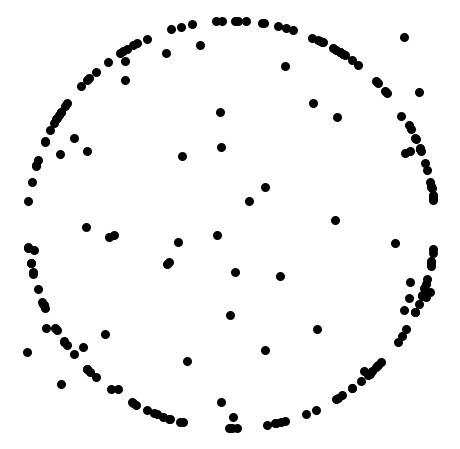

In [10]:
N_observation = 150                                     #number of points sampled on the circle
N_anomalous = 50                                        #number of anomalous points

X = velour.SampleOnCircle(N_observation, N_anomalous)   #sample with anomalous points 

velour.PlotPointCloud(X)                                #displays the point cloud

We first build the usual Rips filtration on this dataset.

Rips Complex is of dimension 3 - 1544716 simplices - 200 vertices. Filtration maximal value is 0.5.


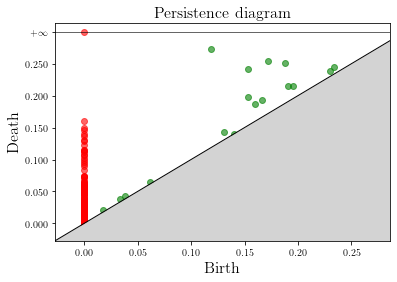

In [11]:
filtration_max = 0.5                                             #maximal filtration value for Rips complex
st_Rips = velour.RipsComplex(X, filtration_max=filtration_max)   #builds the Rips filtration     

velour.PlotPersistenceDiagram(st_Rips)                           #displays the persistence diagram

On this diagram, $0$-homology points are represented in red, and $1$-homology in green.
Note that the $1$-homology feature of the circle does not appear clearly here.

We now illustrate a DTM-filtration on $X$.
First, we compute the values of the DTM, with a given parameter $m \in [0,1)$. 

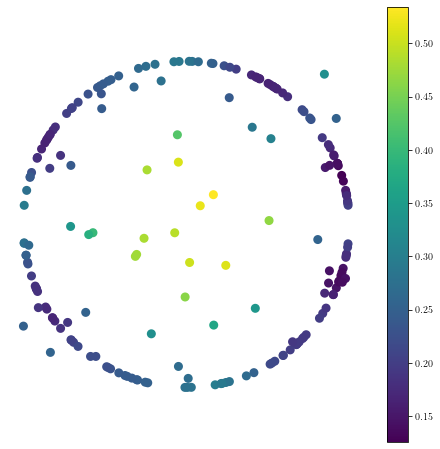

In [12]:
m = 0.1                          #parameter for the DTM
DTM_values = velour.DTM(X,X,m)   #computes the values of the DTM of parameter m
             
velour.PlotPointCloud(X, values = DTM_values) #draws X and the values of DTM

Notice that the DTM takes greater values on the anomalous points.

Now we build a DTM-filtration, and plot its persistence diagram. Remind that filtration depends on a parameter $p \in [1, +\infty]$.

Weighted Rips Complex is of dimension 2 - 411119 simplices - 200 vertices. Filtration maximal value is 1.


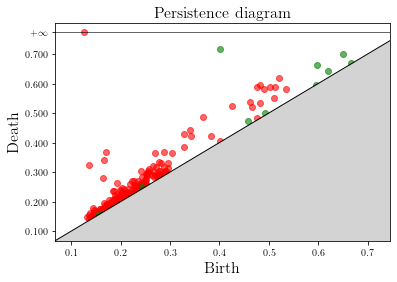

In [13]:
p = 1                                                  #parameter for the DTM-filtration                                             
filtration_max = 1                                     #maximal filtration value for DTM-filtration
dimension_max = 2                                      #maximal dimension to expand the complex
st_DTM = velour.DTMFiltration(X, m, p, dimension_max = dimension_max, filtration_max=filtration_max)
                                                       #creates a DTM-filtration

velour.PlotPersistenceDiagram(st_DTM)                  #displays the persistence diagram

Here, the $1$-homology feature of the circle (green point) looks separated from the noise on the diagram. The DTM-filtration is able to recognize the underlying circle.

We show below how greater values of $p$ tend to sparsify the persistence diagram.

Weighted Rips Complex is of dimension 2 - 796849 simplices - 200 vertices. Filtration maximal value is 1.
Weighted Rips Complex is of dimension 2 - 1252765 simplices - 200 vertices. Filtration maximal value is 1.
Weighted Rips Complex is of dimension 2 - 1291107 simplices - 200 vertices. Filtration maximal value is 1.


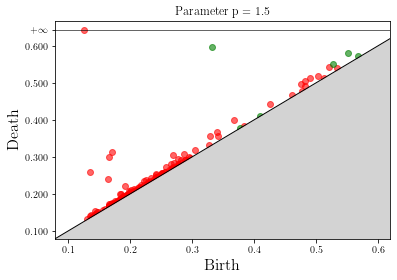

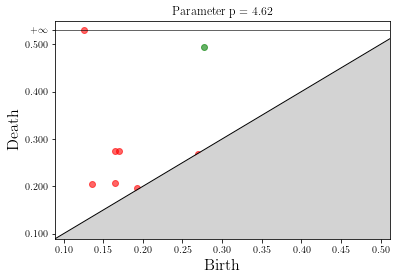

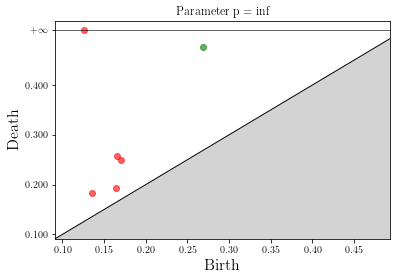

In [20]:
P = [1.5, 4.62, np.inf]

for p in P:
    st_DTM = velour.DTMFiltration(X, m, p, dimension_max = dimension_max, filtration_max=filtration_max)
                                                           #creates a DTM-filtration
    velour.PlotPersistenceDiagram(st_DTM)                  #displays the persistence diagram
    plt.title('Parameter p = '+repr(p))

## Second dataset: necklace

We sample points on the union of a circle and three spheres in $\mathbb{R}^3$.
Its Betti numbers are $(\beta_0,\beta_1, \beta_3) = (1,4,3)$.

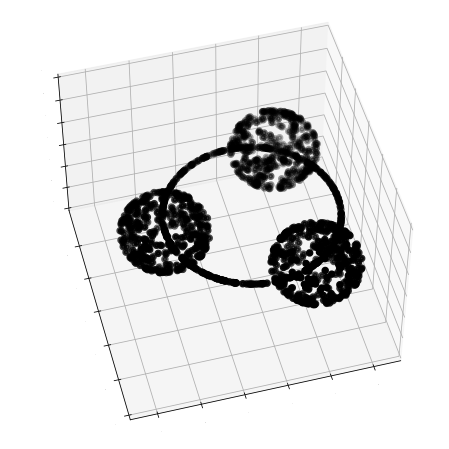

In [36]:
N_observation = 350                          #number of points sampled on each component of the necklace
X = velour.SampleOnNecklace(N_observation)   #samples points on necklace

velour.PlotPointCloud(X, plot_axis = True)   #plots the point cloud

Instead of computing the Rips filtration on $X$, which contains `4*N_observation` vertices, we build the alpha-complex, which contains less simplices.

Alpha-complex is of dimension 3 - 49547 simplices - 1400 vertices.


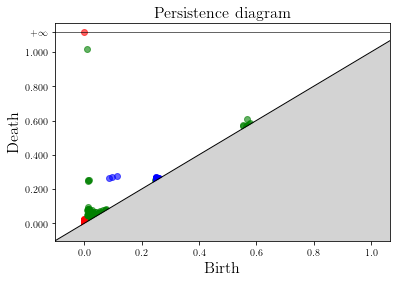

In [37]:
st_alpha = velour.AlphaComplex(X)         #creates an alpha-complex

velour.PlotPersistenceDiagram(st_alpha)   #displays the persistence diagram

Blue points represent the $2$-homology.
Between the values $t \in [0, 0.2]$ one can read the homology of the underlying object: Betti numbers $\beta_0 = 1$, $\beta_1 = 4$ and $\beta_2 = 3$.
We can see this better on the barcodes. In order to ease the reading, only bars of length greater than `eps = 0.05` are plotted. 

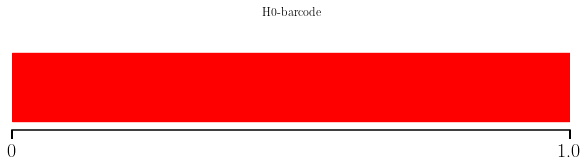

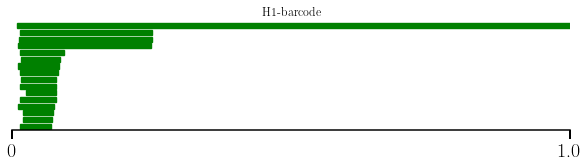

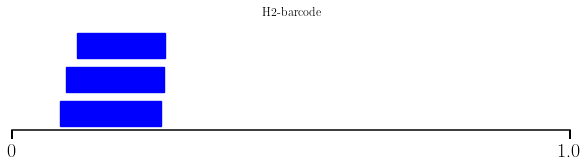

In [39]:
velour.PlotPersistenceBarcodes(st_alpha, eps = 0.05)   #displays the persistence barcodes

We now build a DTM-filtration on $X$.
First, we illustrate how the value of the parameter $m$ can influence the DTM. When the underlying measure admits a density on a $d$-dimensional submanifold $\mathcal{M}$, there exists a constant $C>0$ such that the DTM on $\mathcal{M}$ is lower than $C m^\frac{1}{d}$.

Text(0.5, 0.92, 'Parameter m = 0.3')

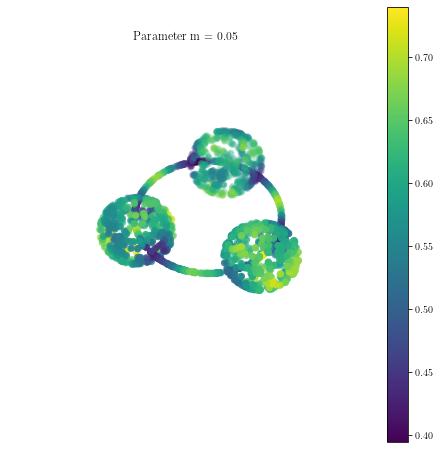

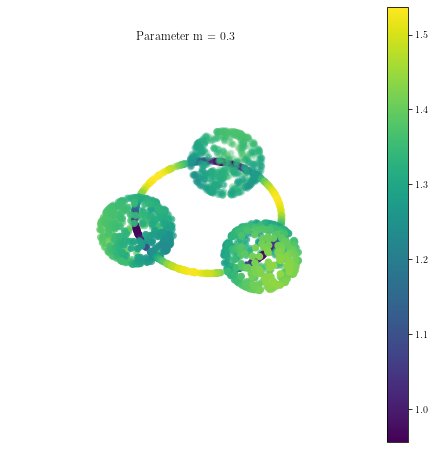

In [40]:
' DTM with parameter m = 0.05 '
m = 0.05
DTM_values = velour.DTM(X,X,m)
velour.PlotPointCloud(X, values = DTM_values)         
plt.title('Parameter m = '+repr(m))

' DTM with parameter m = 0.3 '
m = 0.3
DTM_values = velour.DTM(X,X,m)
velour.PlotPointCloud(X, values = DTM_values)
plt.title('Parameter m = '+repr(m))

It appears that, for a small value of $m$, the DTM takes lower values on the circle than the spheres, while for a greater value of $m$, the DTM takes high values on the circle and outside the spheres.
This observation is consistent with the previous remark: the DTM on the circle is lower than $C m$, while on the sphere it is lower than $C' m^\frac{1}{2}$.

Since the number of points of $X$ is large, we use the function `velour.AlphaDTMFiltration()`.
This construction only is heuristic, but reduces the number of simplices drastically.
We start with the parameter $m = 0.05$.

Alpha Weighted Rips Complex is of dimension 3 - 58342 simplices - 1400 vertices. Filtration maximal value is inf.


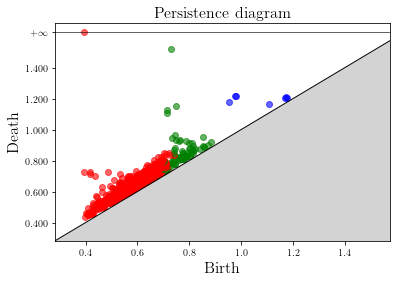

In [41]:
m = 0.05
p = 1
dimension_max = 3

st_DTM_alpha = velour.AlphaDTMFiltration(X, m, p, dimension_max)   #builds the alpha-DTM filtration

velour.PlotPersistenceDiagram(st_DTM_alpha)                        #displays the persistence diagram                                                                  

One can still read the homology of $X$ on this diagram, for the values of $t$ close to 1 (Betti numbers $(\beta_0,\beta_1,\beta_2) = (1,4,3)$). This can also be read on the barcodes. Only bars of length larger than $0.2$ are plotted.

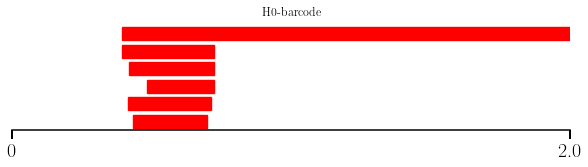

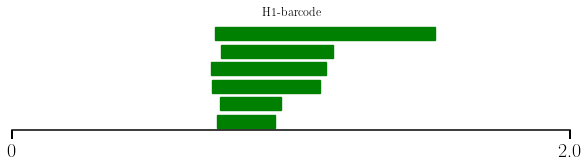

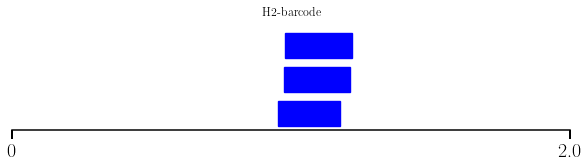

In [42]:
velour.PlotPersistenceBarcodes(st_DTM_alpha, tmax = 2, eps = 0.2)   #displays the persistence barcodes

We now compute the DTM-filtration with the parameter `m = 0.3`.

Alpha Weighted Rips Complex is of dimension 3 - 58342 simplices - 1400 vertices. Filtration maximal value is inf.


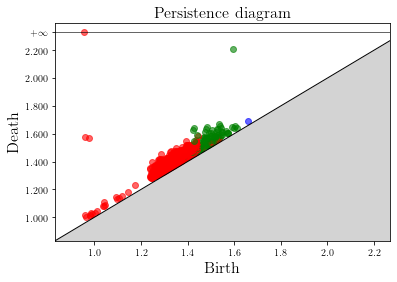

In [43]:
m = 0.3
p = 1
dimension_max = 3

st_DTM_alpha = velour.AlphaDTMFiltration(X, m, p, dimension_max)   #builds the alpha-DTM filtration

velour.PlotPersistenceDiagram(st_DTM_alpha)                        #displays the persistence diagram

On this diagram, the homology of the spheres does not appear anymore, and one reads $(\beta_0,\beta_1,\beta_2) = (3,0,0)$ on the first part of the diagram, and $(\beta_0,\beta_1,\beta_2) = (1,1,0)$ on the second part.
See also the barcodes below (only bars of length larger than $0.25$ are represented).

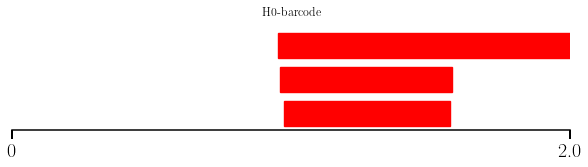

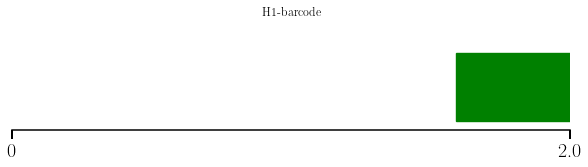

In [44]:
velour.PlotPersistenceBarcodes(st_DTM_alpha, tmax = 2, eps = 0.25)   #displays the persistence barcodes

Let us compare the DTM-filtrations for several values of $p$.

Alpha Weighted Rips Complex is of dimension 3 - 58342 simplices - 1400 vertices. Filtration maximal value is inf.
Alpha Weighted Rips Complex is of dimension 3 - 58342 simplices - 1400 vertices. Filtration maximal value is inf.
Alpha Weighted Rips Complex is of dimension 3 - 58342 simplices - 1400 vertices. Filtration maximal value is inf.


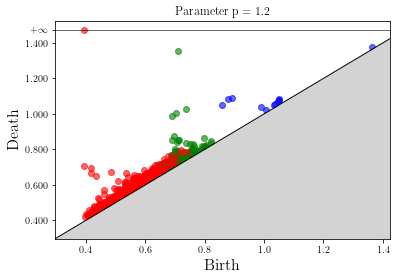

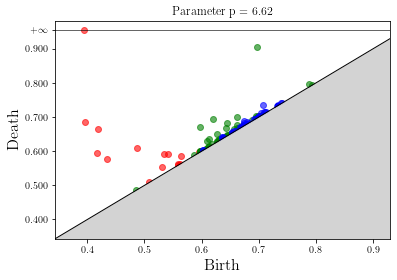

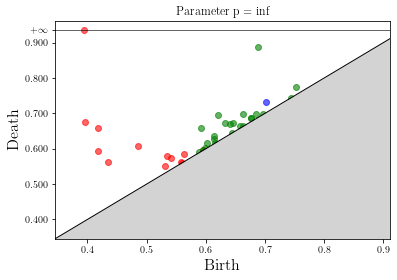

In [45]:
m = 0.05
P = [1.2, 6.62, np.inf]
dimension_max = 3

for p in P:
    st_DTM_alpha = velour.AlphaDTMFiltration(X, m, p, dimension_max)   #builds the alpha-DTM filtration
    velour.PlotPersistenceDiagram(st_DTM_alpha)                        #displays the persistence diagram
    plt.title('Parameter p = '+repr(p))

Notice that, for large values of $p$, the $2$-homology (in blue) of the underlying spheres does not appear clearly on the diagram. Information have been lost.

## Take-home message

Dependance of the DTM on its parameters:
-  higher values of $p$ tend to simplify the persistence diagram,
-  different values of $m$ may highlight various areas of the dataset.

This simple implementation can be used as follows:
``` 
# X is a Nxn np.array
m = .1
p = 1                                            
dimension_max = 2     

st = velour.DTMFiltration(X, m, p, dimension_max)   #builds the DTM-filtration
gudhi.plot_persistence_diagram(st.persistence())    #displays the persistence diagram
```